In [1]:
'''
In most situations, there is no way to determine the best number of hidden
units without training several networks and estimating the generalization
error of each. If you have too few hidden units, you will get high training
error and high generalization error due to underfitting and high statistical
bias. If you have too many hidden units, you may get low training error but
still have high generalization error due to overfitting and high variance.

For this notebook we will use a rule of thumb that has been cited in literature to start with, as our assumption
and expand use a heuristic approach to find the best size of our hidden layer
We want to create a model to determine house prices

We will start with 
   (Number of inputs + outputs) * (2/3) = amount of nodes 
   
We will then take 25% of this amount, then 50%, 75%, and 125% and test which model performs best with the amount of nodes
'''

'\nIn most situations, there is no way to determine the best number of hidden\nunits without training several networks and estimating the generalization\nerror of each. If you have too few hidden units, you will get high training\nerror and high generalization error due to underfitting and high statistical\nbias. If you have too many hidden units, you may get low training error but\nstill have high generalization error due to overfitting and high variance.\n\nFor this notebook we will use a rule of thumb that has been cited in literature to start with, as our assumption\nand expand use a heuristic approach to find the best size of our hidden layer\nWe want to create a model to determine house prices\n\nWe will start with \n   (Number of inputs + outputs) * (2/3) = amount of nodes \n   \nWe will then take 25% of this amount, then 50%, 75%, and 125% and test which model performs best with the amount of nodes\n'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math

In [3]:
house_data = pd.read_csv("kc_house_data.csv")

In [4]:
house_data.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
corr_matrix = house_data.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [7]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [8]:
y = house_data.price

In [9]:
X = house_data[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'floors', 'sqft_lot', 'lat', 'long']]

In [10]:
'''
With all these features we are dealilng with the 'Curse of Dimensionality'

Because our initial selected features have high dimensionality the model will train Very, very slowly. 
For most algorithms, adding dimensions has a non-linear impact on processing time, and once you can no longer fit 
all the data in memory, you should prepare for an exponential increase in processing time.

The common theme of these problems is that when the dimensionality increases, 
the volume of the space increases so fast that the available data become sparse. Meaning we need even more data to train.
In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality.

As the dimensionality increases, the distance between objects may be heavily dominated by noise. That is, the distance and similarity 
between two points in a high-dimensional space may not reflect the real relationship between the points.
'''

"\nWith all these features we are dealilng with the 'Curse of Dimensionality'\n\nBecause our initial selected features have high dimensionality the model will train Very, very slowly. \nFor most algorithms, adding dimensions has a non-linear impact on processing time, and once you can no longer fit \nall the data in memory, you should prepare for an exponential increase in processing time.\n\nThe common theme of these problems is that when the dimensionality increases, \nthe volume of the space increases so fast that the available data become sparse. Meaning we need even more data to train.\nIn order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality.\n\nAs the dimensionality increases, the distance between objects may be heavily dominated by noise. That is, the distance and similarity \nbetween two points in a high-dimensional space may not reflect the real relationship between the points.\n"

In [11]:
X = house_data[['sqft_living', 'grade', 'sqft_above', 'bathrooms']] # minimize dimensionality of features

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [13]:
'''
Our target variable has a high range as well
training and dev loss values, this is entirely dependent on the scale of your target values (how big are your target values?) 
If your target values are big and you want smaller train and dev loss values, you can normalise the target values.

neural networks are sensitive to a range of both features and targets. Normalizing both features and targets can facilitate learning.
'''

'\nOur target variable has a high range as well\ntraining and dev loss values, this is entirely dependent on the scale of your target values (how big are your target values?) \nIf your target values are big and you want smaller train and dev loss values, you can normalise the target values.\n\nneural networks are sensitive to a range of both features and targets. Normalizing both features and targets can facilitate learning.\n'

In [14]:
min(y)

75000.0

In [15]:
max(y)

7700000.0

In [16]:
type(y)

pandas.core.series.Series

In [17]:
norm_y = []
min_y = min(y)
max_y = max(y)
for i in y:
    temp = (i-min_y)/(max_y-min_y)
    norm_y.append(temp)

In [18]:
type(norm_y)

list

In [19]:
norm_y_series = pd.Series(norm_y)

In [20]:
temp_y = y
y = norm_y_series

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [22]:
INPUT_SIZE = X.shape[1]
OUTPUT_SIZE = 1
INITIAL_NODE_SIZE = math.ceil((INPUT_SIZE + OUTPUT_SIZE) * (2/3))

In [23]:
def buildModel(num_nodes=INITIAL_NODE_SIZE):
    model = Sequential()
    model.add(Dense(num_nodes, activation='relu', input_shape=(4,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [24]:
model = buildModel()
model_4_3_1  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
541/541 - 2s - loss: 0.0178 - val_loss: 0.0044 - 2s/epoch - 3ms/step
Epoch 2/50
541/541 - 1s - loss: 0.0034 - val_loss: 0.0023 - 669ms/epoch - 1ms/step
Epoch 3/50
541/541 - 1s - loss: 0.0021 - val_loss: 0.0016 - 722ms/epoch - 1ms/step
Epoch 4/50
541/541 - 1s - loss: 0.0015 - val_loss: 0.0013 - 731ms/epoch - 1ms/step
Epoch 5/50
541/541 - 1s - loss: 0.0013 - val_loss: 0.0011 - 647ms/epoch - 1ms/step
Epoch 6/50
541/541 - 1s - loss: 0.0011 - val_loss: 0.0011 - 579ms/epoch - 1ms/step
Epoch 7/50
541/541 - 1s - loss: 0.0011 - val_loss: 9.9078e-04 - 624ms/epoch - 1ms/step
Epoch 8/50
541/541 - 1s - loss: 0.0011 - val_loss: 9.6660e-04 - 594ms/epoch - 1ms/step
Epoch 9/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.5324e-04 - 612ms/epoch - 1ms/step
Epoch 10/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.9097e-04 - 694ms/epoch - 1ms/step
Epoch 11/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.4128e-04 - 692ms/epoch - 1ms/step
Epoch 12/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.4682e-04 - 623

Text(0, 0.5, 'Validation Error')

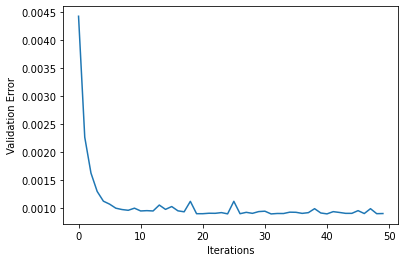

In [26]:
plt.plot(model_4_3_1.history['val_loss'])
plt.xlabel("Iterations")
plt.ylabel("Validation Error")

In [27]:
# Now let's try evaluating models with varying size of the hidden layer
from sklearn.metrics import r2_score
SIZE_MULTIPLIER = [0.25, 0.5, 0.75, 1, 1.25]
MODELS = []
R2_SCORES = []

for i, mp in enumerate(SIZE_MULTIPLIER):
    numNodes = math.ceil(int(INITIAL_NODE_SIZE * mp))
    model = buildModel(numNodes)
    print(f"Model-{i+1} with {numNodes} in hidden layer:\n")
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    MODELS.append(model)
    # note: here we should have set aside another portion of our train-test-split for unseen test data, but since our original dataset is fairly small, we'll stick with using the validation data to evaluate predictions
    y_pred = model.predict(X_test)
    fit_acc = r2_score(y_test, y_pred)
    R2_SCORES.append(fit_acc)
    print(f"Model-{i+1} fit accuracy: {fit_acc}\n\n")


Model-1 with 1 in hidden layer:

Epoch 1/50
541/541 - 1s - loss: 0.0025 - val_loss: 0.0019 - 882ms/epoch - 2ms/step
Epoch 2/50
541/541 - 1s - loss: 0.0019 - val_loss: 0.0017 - 579ms/epoch - 1ms/step
Epoch 3/50
541/541 - 1s - loss: 0.0018 - val_loss: 0.0016 - 660ms/epoch - 1ms/step
Epoch 4/50
541/541 - 1s - loss: 0.0016 - val_loss: 0.0014 - 524ms/epoch - 969us/step
Epoch 5/50
541/541 - 1s - loss: 0.0014 - val_loss: 0.0011 - 554ms/epoch - 1ms/step
Epoch 6/50
541/541 - 1s - loss: 0.0012 - val_loss: 0.0011 - 564ms/epoch - 1ms/step
Epoch 7/50
541/541 - 1s - loss: 0.0012 - val_loss: 0.0010 - 564ms/epoch - 1ms/step
Epoch 8/50
541/541 - 1s - loss: 0.0011 - val_loss: 0.0010 - 558ms/epoch - 1ms/step
Epoch 9/50
541/541 - 1s - loss: 0.0011 - val_loss: 0.0010 - 562ms/epoch - 1ms/step
Epoch 10/50
541/541 - 1s - loss: 0.0011 - val_loss: 0.0010 - 559ms/epoch - 1ms/step
Epoch 11/50
541/541 - 1s - loss: 0.0011 - val_loss: 0.0010 - 562ms/epoch - 1ms/step
Epoch 12/50
541/541 - 1s - loss: 0.0011 - val_loss

Epoch 45/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.5461e-04 - 566ms/epoch - 1ms/step
Epoch 46/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.3254e-04 - 560ms/epoch - 1ms/step
Epoch 47/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.3251e-04 - 511ms/epoch - 944us/step
Epoch 48/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.3433e-04 - 551ms/epoch - 1ms/step
Epoch 49/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.6376e-04 - 554ms/epoch - 1ms/step
Epoch 50/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.3747e-04 - 553ms/epoch - 1ms/step
Model-2 fit accuracy: 0.5753731059900096


Model-3 with 3 in hidden layer:

Epoch 1/50
541/541 - 1s - loss: 0.2993 - val_loss: 0.0847 - 874ms/epoch - 2ms/step
Epoch 2/50
541/541 - 1s - loss: 0.0461 - val_loss: 0.0206 - 546ms/epoch - 1ms/step
Epoch 3/50
541/541 - 1s - loss: 0.0124 - val_loss: 0.0065 - 549ms/epoch - 1ms/step
Epoch 4/50
541/541 - 1s - loss: 0.0047 - val_loss: 0.0032 - 551ms/epoch - 1ms/step
Epoch 5/50
541/541 - 1s - loss: 0.0027 - val_loss: 0.0022 - 54

541/541 - 1s - loss: 0.0010 - val_loss: 9.2219e-04 - 549ms/epoch - 1ms/step
Epoch 38/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.2303e-04 - 551ms/epoch - 1ms/step
Epoch 39/50
541/541 - 1s - loss: 0.0010 - val_loss: 0.0011 - 549ms/epoch - 1ms/step
Epoch 40/50
541/541 - 1s - loss: 0.0010 - val_loss: 9.2051e-04 - 570ms/epoch - 1ms/step
Epoch 41/50
541/541 - 0s - loss: 9.8794e-04 - val_loss: 9.1591e-04 - 471ms/epoch - 871us/step
Epoch 42/50
541/541 - 1s - loss: 9.9417e-04 - val_loss: 8.9013e-04 - 548ms/epoch - 1ms/step
Epoch 43/50
541/541 - 1s - loss: 9.9477e-04 - val_loss: 9.5981e-04 - 502ms/epoch - 928us/step
Epoch 44/50
541/541 - 1s - loss: 9.9132e-04 - val_loss: 9.4000e-04 - 535ms/epoch - 989us/step
Epoch 45/50
541/541 - 1s - loss: 9.9312e-04 - val_loss: 8.9253e-04 - 555ms/epoch - 1ms/step
Epoch 46/50
541/541 - 1s - loss: 9.9617e-04 - val_loss: 9.5865e-04 - 556ms/epoch - 1ms/step
Epoch 47/50
541/541 - 1s - loss: 9.9543e-04 - val_loss: 8.9035e-04 - 552ms/epoch - 1ms/step
Epoch 48/50
54

In [ ]:
# With this outcome, this rule of thumb seems to be debunked, but these models can improve with other techniques such as hyperparamater tuning